<a href="https://colab.research.google.com/github/V-Nayak/DataScience_Assignments/blob/main/Assignment_27june.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Assignment 02 (AIQoD)**
You have to create a ML model that predict the probability that a piece of text belongs to a particular class. Use techniques like Bag of Words, tf idf vectorization and word embedding.

Please use Hash field value and explain how you are going to use the Hash field.

## **Data extraction**
From the documents nGrams have been extracted, Each row in the Train.csvcorresponds to one such nGram. Features For a given nGram several features have been extracted (145).
 These features have been saved in the train.csvand test.csv.
 They have parsing, spatial, content and relative information. • Content: The cryptographic hash of the raw text. • Parsing: nGram is a number, text, alphanumeric, etc. • Spatial: Position and size of the nGram • Relational: details of text nearby the nGram

In [7]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import hamming_loss, f1_score
import scipy.sparse as sp

In [8]:
# Load the data
train_data = pd.read_csv("/content/drive/MyDrive/Data Science Assignement/AIQoD/train.csv")
train_labels = pd.read_csv("/content/drive/MyDrive/Data Science Assignement/AIQoD/trainLabels.csv")
test_data = pd.read_csv("/content/drive/MyDrive/Data Science Assignement/AIQoD/test.csv")

In [9]:
train_data.describe()

,id,x5,x6,x7,x8,x9,x15,x16,x17,x18,...,x133,x134,x135,x136,x137,x138,x139,x143,x144,x145
count,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,...,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,5000.000000,0.964933,0.053623,0.791668,0.172705,0.448091,6.056806,0.418593,4.483448,8.073907,...,9.291529,8.800880,0.933771,0.056523,0.924781,2669.290629,2142.907091,3.667767,0.519482,0.505084
std,2886.607005,0.524688,0.128503,0.353194,0.329020,0.300549,8.756490,0.294579,4.388639,7.032278,...,7.576648,6.584598,0.069921,1.520931,0.118496,1588.220409,1386.559408,11.014722,0.270886,0.256323
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,-0.098334,-17.000000,0.000000,892.000000,838.000000,0.000000,0.021635,0.001327
25%,2500.500000,0.642796,0.000000,0.831299,0.000000,0.199617,1.000000,0.165599,2.000000,3.000000,...,4.000000,4.000000,0.916144,0.000000,0.880000,1262.000000,892.000000,1.000000,0.267939,0.306031
50%,5000.000000,1.285541,0.000000,0.960637,0.000000,0.439504,3.000000,0.395740,4.000000,7.000000,...,7.000000,7.000000,0.949552,0.000000,1.000000,1263.000000,918.000000,2.000000,0.517937,0.484561
75%,7499.500000,1.414798,0.058076,1.000000,0.151543,0.682880,7.000000,0.683908,6.000000,11.000000,...,13.000000,12.000000,0.972222,0.000000,1.000000,4672.000000,3308.000000,5.000000,0.759242,0.707324
max,9999.000000,1.474916,0.992745,1.000000,1.393289,1.098257,88.000000,1.180828,132.000000,118.000000,...,84.000000,118.000000,0.999947,23.000000,1.000000,5217.000000,6622.000000,697.000000,1.238562,1.086371


In [10]:
# Check for NaN values
nan_counts = train_data.isna().sum()
print(nan_counts)

id         0
x1      1426
x2      1426
x3      1426
x4      1426
        ... 
x141       0
x142       0
x143       0
x144       0
x145       0
Length: 146, dtype: int64


In [11]:
train_labels.columns

Index(['id', 'y1', 'y2', 'y3', 'y4', 'y5', 'y6', 'y7', 'y8', 'y9', 'y10',
       'y11', 'y12', 'y13', 'y14', 'y15', 'y16', 'y17', 'y18', 'y19', 'y20',
       'y21', 'y22', 'y23', 'y24', 'y25', 'y26', 'y27', 'y28', 'y29', 'y30',
       'y31', 'y32', 'y33'],
      dtype='object')

In [12]:
# Load data into pandas DataFrames
#train_df = pd.read_csv('train.csv')
#labels_df = pd.read_csv('trainLabels.csv')

# Assuming 'Hashed_Column' is the common identifier
merged_df = pd.merge(train_data, train_labels, on='id')

merged_df

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,y24,y25,y26,y27,y28,y29,y30,y31,y32,y33
0,1,NO,NO,dqOiM6yBYgnVSezBRiQXs9bvOFnRqrtIoXRIElxD7g8=,GNjrXXA3SxbgD0dTRblAPO9jFJ7AIaZnu/f48g5XSUk=,0.576561,0.073139,0.481394,0.115697,0.472474,...,0,0,0,0,0,0,0,0,0,1
1,2,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,1,0
2,3,NO,NO,ib4VpsEsqJHzDiyL0dZLQ+xQzDPrkxE+9T3mx5fv2wI=,X6dDAI/DZOWvu0Dg6gCgRoNr2vTUz/mc4SdHTNUPS38=,1.341803,0.051422,0.935572,0.041440,0.501710,...,0,0,0,0,0,0,0,0,0,0
3,4,YES,NO,BfrqME7vdLw3suQp6YAT16W2piNUmpKhMzuDrVrFQ4w=,YGCdISifn4fLao/ASKdZFhGIq23oqzfSbUVb6px1pig=,0.653912,0.041471,0.940787,0.090851,0.556564,...,0,0,0,0,0,0,0,0,0,1
4,5,NO,NO,RTjsrrR8DTlJyaIP9Q3Z8s0zseqlVQTrlSe97GCWfbk=,3yK2OPj1uYDsoMgsxsjY1FxXkOllD8Xfh20VYGqT+nU=,1.415919,0.000000,1.000000,0.000000,0.375297,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,9995,NO,NO,jComfqYTXYSeH3GvqcOhwPmldb+BCdVJDKKDNkdtw2w=,Kr2CC15nSwDjdpyAeVh4vOuIaHuC/Q7cL9BAK28JoG8=,1.207136,0.082855,0.918960,0.313880,0.495189,...,0,0,0,0,0,0,0,0,0,0
9995,9996,NO,NO,Pr5enXjzVzVjZziZxrDcgnyu6CLUftmEbnp6TctyJbU=,YvZUuCDjLu9VvkCdBWgARWQrvm+FSXgxp0zIrMjcLBc=,1.414798,0.000000,1.000000,0.000000,0.357369,...,0,0,0,0,0,0,0,0,0,1
9996,9997,YES,YES,9Avs0tL1zvH7Xx41z2UqrXs11/4IWLmqRAodLt/SKjQ=,WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=,1.413677,0.000000,1.000000,0.000000,0.668517,...,0,0,0,0,0,0,0,0,0,0
9997,9998,NO,NO,9zkXU3f6YnRPjsWi3lKSCLseIGrleg00tpRI4OplABw=,gOZBAoajyr6i7GgON0N7q5+KE4JTwH3OUM0lZOWMuG8=,1.294118,0.000000,1.000000,0.000000,0.570707,...,0,0,0,0,0,0,0,0,0,1


In [13]:
# Assuming the labels are in columns 'Label1', 'Label2', ..., 'LabelN'
X = merged_df.drop(['id', 'y1', 'y2', 'y3', 'y4', 'y5', 'y6', 'y7', 'y8', 'y9', 'y10',
       'y11', 'y12', 'y13', 'y14', 'y15', 'y16', 'y17', 'y18', 'y19', 'y20',
       'y21', 'y22', 'y23', 'y24', 'y25', 'y26', 'y27', 'y28', 'y29', 'y30',
       'y31', 'y32', 'y33'], axis=1)  # Drop ID and label columns from features
y = merged_df[['y1', 'y2', 'y3', 'y4', 'y5', 'y6', 'y7', 'y8', 'y9', 'y10',
       'y11', 'y12', 'y13', 'y14', 'y15', 'y16', 'y17', 'y18', 'y19', 'y20',
       'y21', 'y22', 'y23', 'y24', 'y25', 'y26', 'y27', 'y28', 'y29', 'y30',
       'y31', 'y32', 'y33']]  # Select multi-label columns as targets

In [14]:
# Inspect the data to understand its structure
print(X.head())
print(y.head())


    x1   x2                                            x3  \
0   NO   NO  dqOiM6yBYgnVSezBRiQXs9bvOFnRqrtIoXRIElxD7g8=   
1  NaN  NaN                                           NaN   
2   NO   NO  ib4VpsEsqJHzDiyL0dZLQ+xQzDPrkxE+9T3mx5fv2wI=   
3  YES   NO  BfrqME7vdLw3suQp6YAT16W2piNUmpKhMzuDrVrFQ4w=   
4   NO   NO  RTjsrrR8DTlJyaIP9Q3Z8s0zseqlVQTrlSe97GCWfbk=   

                                             x4        x5        x6        x7  \
0  GNjrXXA3SxbgD0dTRblAPO9jFJ7AIaZnu/f48g5XSUk=  0.576561  0.073139  0.481394   
1                                           NaN  0.000000  0.000000  0.000000   
2  X6dDAI/DZOWvu0Dg6gCgRoNr2vTUz/mc4SdHTNUPS38=  1.341803  0.051422  0.935572   
3  YGCdISifn4fLao/ASKdZFhGIq23oqzfSbUVb6px1pig=  0.653912  0.041471  0.940787   
4  3yK2OPj1uYDsoMgsxsjY1FxXkOllD8Xfh20VYGqT+nU=  1.415919  0.000000  1.000000   

         x8        x9  x10  ... x136   x137  x138  x139  x140  x141  x142  \
0  0.115697  0.472474  YES  ...  0.0  0.810  3306  4676   YES    NO  

In [15]:
# Define a mapping dictionary for conversion
bool_map = {'YES': True, 'NO': False}

# Iterate over each column in the DataFrame
for col in X.columns:
    # Check if column contains 'yes' and 'no' values (object dtype)
    if X[col].dtype == 'object' and X[col].isin(['YES', 'NO',]).all() or X[col].dtype == 'object' and X[col].isin(['YES', 'NO',np.NaN]).all():
        # Convert 'yes'/'no' values to boolean dtype using map
        X[col] =X[col].map(bool_map).astype(bool)



In [16]:
X

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x136,x137,x138,x139,x140,x141,x142,x143,x144,x145
0,False,False,dqOiM6yBYgnVSezBRiQXs9bvOFnRqrtIoXRIElxD7g8=,GNjrXXA3SxbgD0dTRblAPO9jFJ7AIaZnu/f48g5XSUk=,0.576561,0.073139,0.481394,0.115697,0.472474,True,...,0.0,0.810,3306,4676,True,False,True,2,0.375535,0.464610
1,True,True,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,True,...,0.0,0.510,4678,3306,True,False,True,4,0.741682,0.593630
2,False,False,ib4VpsEsqJHzDiyL0dZLQ+xQzDPrkxE+9T3mx5fv2wI=,X6dDAI/DZOWvu0Dg6gCgRoNr2vTUz/mc4SdHTNUPS38=,1.341803,0.051422,0.935572,0.041440,0.501710,False,...,0.0,0.850,4678,3306,False,False,False,1,0.776467,0.493159
3,True,False,BfrqME7vdLw3suQp6YAT16W2piNUmpKhMzuDrVrFQ4w=,YGCdISifn4fLao/ASKdZFhGIq23oqzfSbUVb6px1pig=,0.653912,0.041471,0.940787,0.090851,0.556564,True,...,0.0,0.945,3306,4678,False,False,True,3,0.168234,0.546582
4,False,False,RTjsrrR8DTlJyaIP9Q3Z8s0zseqlVQTrlSe97GCWfbk=,3yK2OPj1uYDsoMgsxsjY1FxXkOllD8Xfh20VYGqT+nU=,1.415919,0.000000,1.000000,0.000000,0.375297,False,...,0.0,1.000,1263,892,False,False,False,1,0.246637,0.361045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,False,False,jComfqYTXYSeH3GvqcOhwPmldb+BCdVJDKKDNkdtw2w=,Kr2CC15nSwDjdpyAeVh4vOuIaHuC/Q7cL9BAK28JoG8=,1.207136,0.082855,0.918960,0.313880,0.495189,False,...,0.0,0.810,4677,3307,True,False,True,1,0.502268,0.486637
9995,False,False,Pr5enXjzVzVjZziZxrDcgnyu6CLUftmEbnp6TctyJbU=,YvZUuCDjLu9VvkCdBWgARWQrvm+FSXgxp0zIrMjcLBc=,1.414798,0.000000,1.000000,0.000000,0.357369,True,...,0.0,1.000,1262,892,True,False,True,15,0.890135,0.346276
9996,True,True,9Avs0tL1zvH7Xx41z2UqrXs11/4IWLmqRAodLt/SKjQ=,WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=,1.413677,0.000000,1.000000,0.000000,0.668517,True,...,0.0,1.000,1261,892,True,False,True,5,0.726457,0.659001
9997,False,False,9zkXU3f6YnRPjsWi3lKSCLseIGrleg00tpRI4OplABw=,gOZBAoajyr6i7GgON0N7q5+KE4JTwH3OUM0lZOWMuG8=,1.294118,0.000000,1.000000,0.000000,0.570707,False,...,1.0,1.000,1188,918,False,False,False,3,0.450980,0.561448


In [ ]:
# Check for NaN values
nan_counts = train_data.isna().sum()
print(nan_counts)

id         0
x1      1426
x2      1426
x3      1426
x4      1426
        ... 
x141       0
x142       0
x143       0
x144       0
x145       0
Length: 146, dtype: int64


In [17]:
# seperating the object column in new df named object_df
object_df = X.select_dtypes(include=['object'])
object_df


,x3,x4,x34,x35,x61,x64,x65,x91,x94,x95
0,dqOiM6yBYgnVSezBRiQXs9bvOFnRqrtIoXRIElxD7g8=,GNjrXXA3SxbgD0dTRblAPO9jFJ7AIaZnu/f48g5XSUk=,mimucPmJSF6NI6KM6cPIaaVxWaQyIQzSgtwTTb9bKlc=,s7mTY62CCkWUFc36AW2TlYAy5CIcniD2Vz+lHzyYCLg=,+2TNtXRI6r9owdGCS80Ia9VVv8ZpuOpVaHEvxRGGu78=,Op+X3asn5H7EQJErI7PR0NkUs3YB+Ld/8OfWuiOC8tU=,GeerC2BbPUcQfQO86NmvOsKrfTvmW7HF+Iru9y+7DPA=,bxU52teuxC05EZyzFihSiKHczE2ZAIVCXekVLG7j3C0=,+dia7tCOijlRGbABX0YKG5L85x/hXLyJwwplN5Qab04=,f4Uu1R9nnf/h03aqiRQT0Fw3WItzNToLCyRlW1Pn8Z8=
1,NaN,NaN,l0G2rvmLGE6mpPtAibFsoW/0SiNnAuyAc4k35TrHvoQ=,lblNNeOLanWhqgISofUngPYP0Ne1yQv3QeNHqCAoh48=,MZZbXga8gvaCBqWpzrh2iKdOkcsz/bG/z4BVjUnqWT0=,TqL9cs8ZFzALzVpZv6wYBDi+6zwhrdarQE/3FH+XAlA=,aZTF/lredyP4cukeN8bh6kpBjYmS1QFNpPOg2LVm3Lg=,YvZUuCDjLu9VvkCdBWgARWQrvm+FSXgxp0zIrMjcLBc=,dsyhxXKNNJy4WVGD/v4+UGyW3jHWkx2xTdg3STsf34A=,X6dDAI/DZOWvu0Dg6gCgRoNr2vTUz/mc4SdHTNUPS38=
2,ib4VpsEsqJHzDiyL0dZLQ+xQzDPrkxE+9T3mx5fv2wI=,X6dDAI/DZOWvu0Dg6gCgRoNr2vTUz/mc4SdHTNUPS38=,9TRXThP/ifDpJRGFX1LQseibUA1NJ3XM53gy+1eZ46k=,XSJ6E8aAoZC7/KAu3eETpfMg3mCq7HVBFIVIsoMKh9E=,cr+kkNnNFV9YL0vz029hk3ohIDmGuABRVNhFe0ePZyo=,oFsUwSLCWcj8UA1cqILh5afKVcvwlFA+ohJ147Wkz5I=,WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=,X6dDAI/DZOWvu0Dg6gCgRoNr2vTUz/mc4SdHTNUPS38=,mRPnGiKVOWTk/vzZaqlLXZRtdrkcQ/sX0hqBCqOuKq0=,oo9tGpHvTredpg9JkHgYbZAuxcwtSpQxU5mA/zUbxY8=
3,BfrqME7vdLw3suQp6YAT16W2piNUmpKhMzuDrVrFQ4w=,YGCdISifn4fLao/ASKdZFhGIq23oqzfSbUVb6px1pig=,BfrqME7vdLw3suQp6YAT16W2piNUmpKhMzuDrVrFQ4w=,YGCdISifn4fLao/ASKdZFhGIq23oqzfSbUVb6px1pig=,XQG0f+jmjLI0UHAXXH2RYL4MEHa+yd9okO+730PCZuc=,/1yAAEg6Qib4GMD+wvGOlGmpCIPIAzioWtcCwbns9/I=,YGCdISifn4fLao/ASKdZFhGIq23oqzfSbUVb6px1pig=,Vl+TDNSupucNoI+Fqeo7bMCkxg1hRjgTSS6NYb9BW00=,/1yAAEg6Qib4GMD+wvGOlGmpCIPIAzioWtcCwbns9/I=,YGCdISifn4fLao/ASKdZFhGIq23oqzfSbUVb6px1pig=
4,RTjsrrR8DTlJyaIP9Q3Z8s0zseqlVQTrlSe97GCWfbk=,3yK2OPj1uYDsoMgsxsjY1FxXkOllD8Xfh20VYGqT+nU=,XEDyQD4da6aJkZiBf+r7LD2VdhLGnCMsSpuRFUyCZgg=,Co/nVSLofrWsM5qpcKLXfekegArokgN29XjEXttuXK4=,wIHg6aGH2GMPX6l1pCTzeS1bXE4jxRqmd9ubES4HgW8=,ST8+q2Jgb91pWEwLwmSoJzXEGsQKeQGbzlLbgHPtj4w=,rB07AAHPffU4zFFF8IrqfKSltyWcPyy4+q+IM5SLZiQ=,WYQEP5EEzM+P+nfkHKLkGko/S3RdBgfEQ3IcyYwrChE=,fylJzYvYlM0+kRBeLB3eFKKgCibqxFvBa8hL+WStwCE=,IoM2E9pNxABFR+H3yfapUL+ThKm7GtTzY7js9H/H99o=
...,...,...,...,...,...,...,...,...,...,...
9994,jComfqYTXYSeH3GvqcOhwPmldb+BCdVJDKKDNkdtw2w=,Kr2CC15nSwDjdpyAeVh4vOuIaHuC/Q7cL9BAK28JoG8=,SRFkJlXGZgnI2svGQLoCAcrghqMRr+u5s36xzSMAOqg=,ubHy/++3FVAS97znZOt7L+cjkZFJREIiJPRZEfRIztc=,7uf0BQkpKFCgsoTY6hGENDudghJBAtKvDQ3VTc1nO7E=,lPUeS6siL3Hb9UUwnRC9piF2fYeBf+u85lUSgk4qgg4=,3yK2OPj1uYDsoMgsxsjY1FxXkOllD8Xfh20VYGqT+nU=,NMZ5RsVp7WQ9rJP2seQnLYgSaJ7ga0FV3Ieg0DW59C0=,2QaQ5ANfKi6SrWtkIv5y7DUAmEz3dJXLn5fhhjBV8N8=,uO9xKdGEeEsG0BVm6VI/0XYd8E0DRuXXEa2gwcoKHcg=
9995,Pr5enXjzVzVjZziZxrDcgnyu6CLUftmEbnp6TctyJbU=,YvZUuCDjLu9VvkCdBWgARWQrvm+FSXgxp0zIrMjcLBc=,v4GptRPKxsWXk7yKmmdhHBTqN7QoYJTK1GPjpjppMa4=,WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=,gtvCdEuc1Tnjv6MSRDG8mAMO+KHeyqX/rg0IQwpdbi8=,v4GptRPKxsWXk7yKmmdhHBTqN7QoYJTK1GPjpjppMa4=,WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=,zX9+hre+RQeHdvHyFAguXw2WNsshYzygopGqPn/BDLc=,v4GptRPKxsWXk7yKmmdhHBTqN7QoYJTK1GPjpjppMa4=,WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=
9996,9Avs0tL1zvH7Xx41z2UqrXs11/4IWLmqRAodLt/SKjQ=,WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=,9cgVS5E58bStBXAoRa9+MN4C7HpJh+UfM6/QcCwH0k4=,FExKgjj6CsbToTubdZ+kGsOmUx3gCvZVJCdZPcdPNF4=,9Avs0tL1zvH7Xx41z2UqrXs11/4IWLmqRAodLt/SKjQ=,c5oB4c9pSRTzkd4PmhzY4BazFbmVHbhy0lbyPp7aRbA=,YvZUuCDjLu9VvkCdBWgARWQrvm+FSXgxp0zIrMjcLBc=,WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=,zOxT5daF0yUlUsnKTZeXgFCmbLqtE7oBITbptqroU/Q=,tnLDGLnpYhzsik5+X+WPo4KQJoQA0TfWRlmEtQ3XNJQ=
9997,9zkXU3f6YnRPjsWi3lKSCLseIGrleg00tpRI4OplABw=,gOZBAoajyr6i7GgON0N7q5+KE4JTwH3OUM0lZOWMuG8=,lnHueTbAHnZiCYqByDCzhzcB9kjjnk6GOmLFNK8gG00=,Kr2CC15nSwDjdpyAeVh4vOuIaHuC/Q7cL9BAK28JoG8=,zsF/C4x766PfoC59pZccSIWFOtQtiX/RPXB76PwIvIg=,lnHueTbAHnZiCYqByDCzhzcB9kjjnk6GOmLFNK8gG00=,Kr2CC15nSwDjdpyAeVh4vOuIaHuC/Q7cL9BAK28JoG8=,kZD8nTcJKVhhRKawBwobfk93XBOLQrH0jlf74jOnMuI=,Ymx/TSp54

In [ ]:
# Define the hashed columns and exclude them from the features used for training
hashed_columns = ['x3', 'x4', 'x34', 'x35', 'x61', 'x64', 'x65', 'x91', 'x94', 'x95']

# Define other features (excluding the hashed columns)
other_features = [col for col in X.columns if col not in hashed_columns]


In [ ]:
other_features

['x1',
 'x2',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x13',
 'x14',
 'x15',
 'x16',
 'x17',
 'x18',
 'x19',
 'x20',
 'x21',
 'x22',
 'x23',
 'x24',
 'x25',
 'x26',
 'x27',
 'x28',
 'x29',
 'x30',
 'x31',
 'x32',
 'x33',
 'x36',
 'x37',
 'x38',
 'x39',
 'x40',
 'x41',
 'x42',
 'x43',
 'x44',
 'x45',
 'x46',
 'x47',
 'x48',
 'x49',
 'x50',
 'x51',
 'x52',
 'x53',
 'x54',
 'x55',
 'x56',
 'x57',
 'x58',
 'x59',
 'x60',
 'x62',
 'x63',
 'x66',
 'x67',
 'x68',
 'x69',
 'x70',
 'x71',
 'x72',
 'x73',
 'x74',
 'x75',
 'x76',
 'x77',
 'x78',
 'x79',
 'x80',
 'x81',
 'x82',
 'x83',
 'x84',
 'x85',
 'x86',
 'x87',
 'x88',
 'x89',
 'x90',
 'x92',
 'x93',
 'x96',
 'x97',
 'x98',
 'x99',
 'x100',
 'x101',
 'x102',
 'x103',
 'x104',
 'x105',
 'x106',
 'x107',
 'x108',
 'x109',
 'x110',
 'x111',
 'x112',
 'x113',
 'x114',
 'x115',
 'x116',
 'x117',
 'x118',
 'x119',
 'x120',
 'x121',
 'x122',
 'x123',
 'x124',
 'x125',
 'x126',
 'x127',
 'x128',
 'x129',
 'x130',
 'x131',
 'x132'

In [ ]:
 X[other_features]


,x1,x2,x5,x6,x7,x8,x9,x10,x11,x12,...,x136,x137,x138,x139,x140,x141,x142,x143,x144,x145
0,False,False,0.576561,0.073139,0.481394,0.115697,0.472474,True,False,False,...,0.0,0.810,3306,4676,True,False,True,2,0.375535,0.464610
1,True,True,0.000000,0.000000,0.000000,0.000000,0.000000,True,True,True,...,0.0,0.510,4678,3306,True,False,True,4,0.741682,0.593630
2,False,False,1.341803,0.051422,0.935572,0.041440,0.501710,False,False,True,...,0.0,0.850,4678,3306,False,False,False,1,0.776467,0.493159
3,True,False,0.653912,0.041471,0.940787,0.090851,0.556564,True,False,False,...,0.0,0.945,3306,4678,False,False,True,3,0.168234,0.546582
4,False,False,1.415919,0.000000,1.000000,0.000000,0.375297,False,False,True,...,0.0,1.000,1263,892,False,False,False,1,0.246637,0.361045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,False,False,1.207136,0.082855,0.918960,0.313880,0.495189,False,False,False,...,0.0,0.810,4677,3307,True,False,True,1,0.502268,0.486637
9995,False,False,1.414798,0.000000,1.000000,0.000000,0.357369,True,False,False,...,0.0,1.000,1262,892,True,False,True,15,0.890135,0.346276
9996,True,True,1.413677,0.000000,1.000000,0.000000,0.668517,True,False,False,...,0.0,1.000,1261,892,True,False,True,5,0.726457,0.659001
9997,False,False,1.294118,0.000000,1.000000,0.000000,0.570707,False,False,False,...,1.0,1.000,1188,918,False,False,False,3,0.450980,0.561448


In [ ]:
X_subset =  X[other_features]
X_subset

,x1,x2,x5,x6,x7,x8,x9,x10,x11,x12,...,x136,x137,x138,x139,x140,x141,x142,x143,x144,x145
0,False,False,0.576561,0.073139,0.481394,0.115697,0.472474,True,False,False,...,0.0,0.810,3306,4676,True,False,True,2,0.375535,0.464610
1,True,True,0.000000,0.000000,0.000000,0.000000,0.000000,True,True,True,...,0.0,0.510,4678,3306,True,False,True,4,0.741682,0.593630
2,False,False,1.341803,0.051422,0.935572,0.041440,0.501710,False,False,True,...,0.0,0.850,4678,3306,False,False,False,1,0.776467,0.493159
3,True,False,0.653912,0.041471,0.940787,0.090851,0.556564,True,False,False,...,0.0,0.945,3306,4678,False,False,True,3,0.168234,0.546582
4,False,False,1.415919,0.000000,1.000000,0.000000,0.375297,False,False,True,...,0.0,1.000,1263,892,False,False,False,1,0.246637,0.361045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,False,False,1.207136,0.082855,0.918960,0.313880,0.495189,False,False,False,...,0.0,0.810,4677,3307,True,False,True,1,0.502268,0.486637
9995,False,False,1.414798,0.000000,1.000000,0.000000,0.357369,True,False,False,...,0.0,1.000,1262,892,True,False,True,15,0.890135,0.346276
9996,True,True,1.413677,0.000000,1.000000,0.000000,0.668517,True,False,False,...,0.0,1.000,1261,892,True,False,True,5,0.726457,0.659001
9997,False,False,1.294118,0.000000,1.000000,0.000000,0.570707,False,False,False,...,1.0,1.000,1188,918,False,False,False,3,0.450980,0.561448


In [ ]:
y_subset = y.head(10000)
y_subset

,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,...,y24,y25,y26,y27,y28,y29,y30,y31,y32,y33
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9996,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Define the hashed columns and exclude them from the features used for training
hashed_columns = ['id','x3', 'x4', 'x34', 'x35', 'x61', 'x64', 'x65', 'x91', 'x94', 'x95']

# Define other features (excluding the hashed columns)
other_features = [col for col in test_data.columns if col not in hashed_columns]

In [ ]:
test_data[other_features].head(5)

,x1,x2,x5,x6,x7,x8,x9,x10,x11,x12,...,x136,x137,x138,x139,x140,x141,x142,x143,x144,x145
0,False,False,1.414798,0.000000,1.000000,0.000000,0.202060,False,False,False,...,0.0,1.000000,1262,892,False,False,False,0,0.089686,0.193344
1,False,False,0.832679,0.049834,0.945938,0.317427,0.482021,True,False,False,...,1.0,0.866667,4672,3311,False,False,False,5,0.945032,0.471318
2,False,False,1.415919,0.000000,1.000000,0.000000,0.703088,False,False,True,...,-1.0,1.000000,1263,892,False,False,False,8,0.557175,0.693587
3,True,True,0.000000,0.000000,0.000000,0.000000,0.000000,True,True,True,...,0.0,0.870000,4672,3306,True,False,True,0,0.870538,0.405822
4,False,False,1.129212,0.087020,0.814240,1.112804,0.874318,False,False,False,...,0.0,0.870000,4400,3413,True,False,True,2,0.224729,0.870909


In [ ]:
# Define a mapping dictionary for conversion
bool_map = {'YES': True, 'NO': False}

# Iterate over each column in the DataFrame
for col in test_data.columns:
    # Check if column contains 'yes' and 'no' values (object dtype)
    if test_data[col].dtype == 'object' and test_data[col].isin(['YES', 'NO',]).all() or test_data[col].dtype == 'object' and test_data[col].isin(['YES', 'NO',np.NaN]).all():

    # Convert 'yes'/'no' values to boolean dtype using map
     test_data[col] =test_data[col].map(bool_map).astype(bool)

### ***Here we have choosen 100 rows for reducing memory usage ***

In [ ]:
# Separate the features and labels
X_train = X_subset
y_train = y_subset

In [ ]:
# Scaling other features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(test_data[other_features])

In [ ]:
# If there are text features, apply TF-IDF vectorization (example)
# Assuming 'text_column' is a column containing text data
# vectorizer = TfidfVectorizer()
# X_train_text = vectorizer.fit_transform(X_train['text_column'])
# X_test_text = vectorizer.transform(test_data['text_column'])



# Combine features if text features are included
# X_train_combined = sp.hstack((X_train_text, X_train_scaled))
# X_test_combined = sp.hstack((X_test_text, X_test_scaled))

# For simplicity, if no text feature, just use the scaled features
X_train_combined = X_train_scaled
X_test_combined = X_test_scaled

In [ ]:
# Train-test split for validation
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_combined, y_train, test_size=0.2, random_state=42)

In [ ]:
# Model training
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
multi_target_rf = MultiOutputClassifier(rf_classifier, n_jobs=-1)
multi_target_rf.fit(X_train_split, y_train_split)

MultiOutputClassifier(estimator=RandomForestClassifier(random_state=42),
                      n_jobs=-1)

In [ ]:
# Model evaluation
y_val_pred = multi_target_rf.predict(X_val_split)

y_val_pred

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [ ]:
# Predictions on the test set
y_test_pred = multi_target_rf.predict(X_test_combined)
#y_test_pred_proba = multi_target_rf.predict_proba(X_test_combined)

In [ ]:
y_test_pred

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [ ]:
# Convert the y_test_pred array to a DataFrame
y_test_pred_df = pd.DataFrame(y_test_pred)

# Assign appropriate column names (assuming the labels are y1, y2, ..., y33)
num_labels = y_test_pred.shape[1]
y_test_pred_df.columns = [f'y{i+1}' for i in range(num_labels)]

# Create an index starting from 1698001
start_index = 1698001
y_test_pred_df.index = range(start_index, start_index + len(y_test_pred_df))

# Reshape the DataFrame to the desired format
submission = []
for i in y_test_pred_df.index:
    for j in y_test_pred_df.columns:
        submission.append([f"{i}_{j}", y_test_pred_df.loc[i, j]])

# Convert the list to a DataFrame
submission_df = pd.DataFrame(submission, columns=["id_label", "pred"])

# Save the DataFrame to a CSV file
submission_df.to_csv('pred_submission.csv', index=False)


In [ ]:
submission_df

,id_label,pred
0,1698001_y1,0
1,1698001_y2,0
2,1698001_y3,0
3,1698001_y4,0
4,1698001_y5,0
...,...,...
65995,1700000_y29,0
65996,1700000_y30,0
65997,1700000_y31,0
65998,1700000_y32,0


# ***Making Use of hashed columns ***

# **Hashing Use Cases**
Once you have an adequate hashing function with all these characteristics, you can apply it to various use cases. Hashing functions work well for:

**Password storage** — Hashing is one of the best ways to store user passwords in modern systems. Python combines various modules to hash and secure passwords before storing them in a database.

**Caching** — Hashing stores a function’s output to save time when calling it later.

**Data retrieval—** Python uses a hash table with a built-in dictionary data structure to quickly retrieve values by key.

**Digital signatures** — Hashing can verify the authenticity of messages that have digital signatures.

**File integrity checks** — Hashing can check a file’s integrity during its transfer and download.

## **Limitations of Hashing**
Although Python’s hash function is promising for various use cases, its limitations make it unsuitable for security purposes. Here’s how:

Collision attacks — A collision occurs when two different inputs produce the same hash value. An attacker could use the same input-making method to bypass security measures that rely on hash values for authentication or data integrity checks.(**the MurmurHash function** is often used for feature hashing because it tends to produce fewer collisions than other hashing functions.)

Limited input size — Since hash functions produce a fixed-sized output regardless of the input’s size, an input larger in size than the hash function’s output can cause a collision.

Predictability — A hash function should be deterministic, giving the same output every time you provide the same input. Attackers might take advantage of this weakness by precompiling hash values for many inputs, and then comparing them to target value hashes to find a match. This process is called a rainbow table attack. To prevent attacks and keep your data safe, use secure hashing algorithms designed to resist such vulnerabilities.

In [ ]:
import scipy.stats

In [ ]:
hashed = train_data[hashed_columns]
hashed

,x3,x4,x34,x35,x61,x64,x65,x91,x94,x95
0,dqOiM6yBYgnVSezBRiQXs9bvOFnRqrtIoXRIElxD7g8=,GNjrXXA3SxbgD0dTRblAPO9jFJ7AIaZnu/f48g5XSUk=,mimucPmJSF6NI6KM6cPIaaVxWaQyIQzSgtwTTb9bKlc=,s7mTY62CCkWUFc36AW2TlYAy5CIcniD2Vz+lHzyYCLg=,+2TNtXRI6r9owdGCS80Ia9VVv8ZpuOpVaHEvxRGGu78=,Op+X3asn5H7EQJErI7PR0NkUs3YB+Ld/8OfWuiOC8tU=,GeerC2BbPUcQfQO86NmvOsKrfTvmW7HF+Iru9y+7DPA=,bxU52teuxC05EZyzFihSiKHczE2ZAIVCXekVLG7j3C0=,+dia7tCOijlRGbABX0YKG5L85x/hXLyJwwplN5Qab04=,f4Uu1R9nnf/h03aqiRQT0Fw3WItzNToLCyRlW1Pn8Z8=
1,NaN,NaN,l0G2rvmLGE6mpPtAibFsoW/0SiNnAuyAc4k35TrHvoQ=,lblNNeOLanWhqgISofUngPYP0Ne1yQv3QeNHqCAoh48=,MZZbXga8gvaCBqWpzrh2iKdOkcsz/bG/z4BVjUnqWT0=,TqL9cs8ZFzALzVpZv6wYBDi+6zwhrdarQE/3FH+XAlA=,aZTF/lredyP4cukeN8bh6kpBjYmS1QFNpPOg2LVm3Lg=,YvZUuCDjLu9VvkCdBWgARWQrvm+FSXgxp0zIrMjcLBc=,dsyhxXKNNJy4WVGD/v4+UGyW3jHWkx2xTdg3STsf34A=,X6dDAI/DZOWvu0Dg6gCgRoNr2vTUz/mc4SdHTNUPS38=
2,ib4VpsEsqJHzDiyL0dZLQ+xQzDPrkxE+9T3mx5fv2wI=,X6dDAI/DZOWvu0Dg6gCgRoNr2vTUz/mc4SdHTNUPS38=,9TRXThP/ifDpJRGFX1LQseibUA1NJ3XM53gy+1eZ46k=,XSJ6E8aAoZC7/KAu3eETpfMg3mCq7HVBFIVIsoMKh9E=,cr+kkNnNFV9YL0vz029hk3ohIDmGuABRVNhFe0ePZyo=,oFsUwSLCWcj8UA1cqILh5afKVcvwlFA+ohJ147Wkz5I=,WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=,X6dDAI/DZOWvu0Dg6gCgRoNr2vTUz/mc4SdHTNUPS38=,mRPnGiKVOWTk/vzZaqlLXZRtdrkcQ/sX0hqBCqOuKq0=,oo9tGpHvTredpg9JkHgYbZAuxcwtSpQxU5mA/zUbxY8=
3,BfrqME7vdLw3suQp6YAT16W2piNUmpKhMzuDrVrFQ4w=,YGCdISifn4fLao/ASKdZFhGIq23oqzfSbUVb6px1pig=,BfrqME7vdLw3suQp6YAT16W2piNUmpKhMzuDrVrFQ4w=,YGCdISifn4fLao/ASKdZFhGIq23oqzfSbUVb6px1pig=,XQG0f+jmjLI0UHAXXH2RYL4MEHa+yd9okO+730PCZuc=,/1yAAEg6Qib4GMD+wvGOlGmpCIPIAzioWtcCwbns9/I=,YGCdISifn4fLao/ASKdZFhGIq23oqzfSbUVb6px1pig=,Vl+TDNSupucNoI+Fqeo7bMCkxg1hRjgTSS6NYb9BW00=,/1yAAEg6Qib4GMD+wvGOlGmpCIPIAzioWtcCwbns9/I=,YGCdISifn4fLao/ASKdZFhGIq23oqzfSbUVb6px1pig=
4,RTjsrrR8DTlJyaIP9Q3Z8s0zseqlVQTrlSe97GCWfbk=,3yK2OPj1uYDsoMgsxsjY1FxXkOllD8Xfh20VYGqT+nU=,XEDyQD4da6aJkZiBf+r7LD2VdhLGnCMsSpuRFUyCZgg=,Co/nVSLofrWsM5qpcKLXfekegArokgN29XjEXttuXK4=,wIHg6aGH2GMPX6l1pCTzeS1bXE4jxRqmd9ubES4HgW8=,ST8+q2Jgb91pWEwLwmSoJzXEGsQKeQGbzlLbgHPtj4w=,rB07AAHPffU4zFFF8IrqfKSltyWcPyy4+q+IM5SLZiQ=,WYQEP5EEzM+P+nfkHKLkGko/S3RdBgfEQ3IcyYwrChE=,fylJzYvYlM0+kRBeLB3eFKKgCibqxFvBa8hL+WStwCE=,IoM2E9pNxABFR+H3yfapUL+ThKm7GtTzY7js9H/H99o=
...,...,...,...,...,...,...,...,...,...,...
9994,jComfqYTXYSeH3GvqcOhwPmldb+BCdVJDKKDNkdtw2w=,Kr2CC15nSwDjdpyAeVh4vOuIaHuC/Q7cL9BAK28JoG8=,SRFkJlXGZgnI2svGQLoCAcrghqMRr+u5s36xzSMAOqg=,ubHy/++3FVAS97znZOt7L+cjkZFJREIiJPRZEfRIztc=,7uf0BQkpKFCgsoTY6hGENDudghJBAtKvDQ3VTc1nO7E=,lPUeS6siL3Hb9UUwnRC9piF2fYeBf+u85lUSgk4qgg4=,3yK2OPj1uYDsoMgsxsjY1FxXkOllD8Xfh20VYGqT+nU=,NMZ5RsVp7WQ9rJP2seQnLYgSaJ7ga0FV3Ieg0DW59C0=,2QaQ5ANfKi6SrWtkIv5y7DUAmEz3dJXLn5fhhjBV8N8=,uO9xKdGEeEsG0BVm6VI/0XYd8E0DRuXXEa2gwcoKHcg=
9995,Pr5enXjzVzVjZziZxrDcgnyu6CLUftmEbnp6TctyJbU=,YvZUuCDjLu9VvkCdBWgARWQrvm+FSXgxp0zIrMjcLBc=,v4GptRPKxsWXk7yKmmdhHBTqN7QoYJTK1GPjpjppMa4=,WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=,gtvCdEuc1Tnjv6MSRDG8mAMO+KHeyqX/rg0IQwpdbi8=,v4GptRPKxsWXk7yKmmdhHBTqN7QoYJTK1GPjpjppMa4=,WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=,zX9+hre+RQeHdvHyFAguXw2WNsshYzygopGqPn/BDLc=,v4GptRPKxsWXk7yKmmdhHBTqN7QoYJTK1GPjpjppMa4=,WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=
9996,9Avs0tL1zvH7Xx41z2UqrXs11/4IWLmqRAodLt/SKjQ=,WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=,9cgVS5E58bStBXAoRa9+MN4C7HpJh+UfM6/QcCwH0k4=,FExKgjj6CsbToTubdZ+kGsOmUx3gCvZVJCdZPcdPNF4=,9Avs0tL1zvH7Xx41z2UqrXs11/4IWLmqRAodLt/SKjQ=,c5oB4c9pSRTzkd4PmhzY4BazFbmVHbhy0lbyPp7aRbA=,YvZUuCDjLu9VvkCdBWgARWQrvm+FSXgxp0zIrMjcLBc=,WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=,zOxT5daF0yUlUsnKTZeXgFCmbLqtE7oBITbptqroU/Q=,tnLDGLnpYhzsik5+X+WPo4KQJoQA0TfWRlmEtQ3XNJQ=
9997,9zkXU3f6YnRPjsWi3lKSCLseIGrleg00tpRI4OplABw=,gOZBAoajyr6i7GgON0N7q5+KE4JTwH3OUM0lZOWMuG8=,lnHueTbAHnZiCYqByDCzhzcB9kjjnk6GOmLFNK8gG00=,Kr2CC15nSwDjdpyAeVh4vOuIaHuC/Q7cL9BAK28JoG8=,zsF/C4x766PfoC59pZccSIWFOtQtiX/RPXB76PwIvIg=,lnHueTbAHnZiCYqByDCzhzcB9kjjnk6GOmLFNK8gG00=,Kr2CC15nSwDjdpyAeVh4vOuIaHuC/Q7cL9BAK28JoG8=,kZD8nTcJKVhhRKawBwobfk93XBOLQrH0jlf74jOnMuI=,Ymx/TSp54

In [ ]:
 # Check for missing values in object columns, considering only object columns
object_cols = hashed.select_dtypes(include=['O']).columns
object_cols_with_missing = [col for col in object_cols if hashed[col].isnull().any()]

# Forward fill missing values in object columns
hashed[object_cols_with_missing] = hashed[object_cols_with_missing].fillna(method='ffill')

hashed

,x3,x4,x34,x35,x61,x64,x65,x91,x94,x95
0,dqOiM6yBYgnVSezBRiQXs9bvOFnRqrtIoXRIElxD7g8=,GNjrXXA3SxbgD0dTRblAPO9jFJ7AIaZnu/f48g5XSUk=,mimucPmJSF6NI6KM6cPIaaVxWaQyIQzSgtwTTb9bKlc=,s7mTY62CCkWUFc36AW2TlYAy5CIcniD2Vz+lHzyYCLg=,+2TNtXRI6r9owdGCS80Ia9VVv8ZpuOpVaHEvxRGGu78=,Op+X3asn5H7EQJErI7PR0NkUs3YB+Ld/8OfWuiOC8tU=,GeerC2BbPUcQfQO86NmvOsKrfTvmW7HF+Iru9y+7DPA=,bxU52teuxC05EZyzFihSiKHczE2ZAIVCXekVLG7j3C0=,+dia7tCOijlRGbABX0YKG5L85x/hXLyJwwplN5Qab04=,f4Uu1R9nnf/h03aqiRQT0Fw3WItzNToLCyRlW1Pn8Z8=
1,dqOiM6yBYgnVSezBRiQXs9bvOFnRqrtIoXRIElxD7g8=,GNjrXXA3SxbgD0dTRblAPO9jFJ7AIaZnu/f48g5XSUk=,l0G2rvmLGE6mpPtAibFsoW/0SiNnAuyAc4k35TrHvoQ=,lblNNeOLanWhqgISofUngPYP0Ne1yQv3QeNHqCAoh48=,MZZbXga8gvaCBqWpzrh2iKdOkcsz/bG/z4BVjUnqWT0=,TqL9cs8ZFzALzVpZv6wYBDi+6zwhrdarQE/3FH+XAlA=,aZTF/lredyP4cukeN8bh6kpBjYmS1QFNpPOg2LVm3Lg=,YvZUuCDjLu9VvkCdBWgARWQrvm+FSXgxp0zIrMjcLBc=,dsyhxXKNNJy4WVGD/v4+UGyW3jHWkx2xTdg3STsf34A=,X6dDAI/DZOWvu0Dg6gCgRoNr2vTUz/mc4SdHTNUPS38=
2,ib4VpsEsqJHzDiyL0dZLQ+xQzDPrkxE+9T3mx5fv2wI=,X6dDAI/DZOWvu0Dg6gCgRoNr2vTUz/mc4SdHTNUPS38=,9TRXThP/ifDpJRGFX1LQseibUA1NJ3XM53gy+1eZ46k=,XSJ6E8aAoZC7/KAu3eETpfMg3mCq7HVBFIVIsoMKh9E=,cr+kkNnNFV9YL0vz029hk3ohIDmGuABRVNhFe0ePZyo=,oFsUwSLCWcj8UA1cqILh5afKVcvwlFA+ohJ147Wkz5I=,WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=,X6dDAI/DZOWvu0Dg6gCgRoNr2vTUz/mc4SdHTNUPS38=,mRPnGiKVOWTk/vzZaqlLXZRtdrkcQ/sX0hqBCqOuKq0=,oo9tGpHvTredpg9JkHgYbZAuxcwtSpQxU5mA/zUbxY8=
3,BfrqME7vdLw3suQp6YAT16W2piNUmpKhMzuDrVrFQ4w=,YGCdISifn4fLao/ASKdZFhGIq23oqzfSbUVb6px1pig=,BfrqME7vdLw3suQp6YAT16W2piNUmpKhMzuDrVrFQ4w=,YGCdISifn4fLao/ASKdZFhGIq23oqzfSbUVb6px1pig=,XQG0f+jmjLI0UHAXXH2RYL4MEHa+yd9okO+730PCZuc=,/1yAAEg6Qib4GMD+wvGOlGmpCIPIAzioWtcCwbns9/I=,YGCdISifn4fLao/ASKdZFhGIq23oqzfSbUVb6px1pig=,Vl+TDNSupucNoI+Fqeo7bMCkxg1hRjgTSS6NYb9BW00=,/1yAAEg6Qib4GMD+wvGOlGmpCIPIAzioWtcCwbns9/I=,YGCdISifn4fLao/ASKdZFhGIq23oqzfSbUVb6px1pig=
4,RTjsrrR8DTlJyaIP9Q3Z8s0zseqlVQTrlSe97GCWfbk=,3yK2OPj1uYDsoMgsxsjY1FxXkOllD8Xfh20VYGqT+nU=,XEDyQD4da6aJkZiBf+r7LD2VdhLGnCMsSpuRFUyCZgg=,Co/nVSLofrWsM5qpcKLXfekegArokgN29XjEXttuXK4=,wIHg6aGH2GMPX6l1pCTzeS1bXE4jxRqmd9ubES4HgW8=,ST8+q2Jgb91pWEwLwmSoJzXEGsQKeQGbzlLbgHPtj4w=,rB07AAHPffU4zFFF8IrqfKSltyWcPyy4+q+IM5SLZiQ=,WYQEP5EEzM+P+nfkHKLkGko/S3RdBgfEQ3IcyYwrChE=,fylJzYvYlM0+kRBeLB3eFKKgCibqxFvBa8hL+WStwCE=,IoM2E9pNxABFR+H3yfapUL+ThKm7GtTzY7js9H/H99o=
...,...,...,...,...,...,...,...,...,...,...
9994,jComfqYTXYSeH3GvqcOhwPmldb+BCdVJDKKDNkdtw2w=,Kr2CC15nSwDjdpyAeVh4vOuIaHuC/Q7cL9BAK28JoG8=,SRFkJlXGZgnI2svGQLoCAcrghqMRr+u5s36xzSMAOqg=,ubHy/++3FVAS97znZOt7L+cjkZFJREIiJPRZEfRIztc=,7uf0BQkpKFCgsoTY6hGENDudghJBAtKvDQ3VTc1nO7E=,lPUeS6siL3Hb9UUwnRC9piF2fYeBf+u85lUSgk4qgg4=,3yK2OPj1uYDsoMgsxsjY1FxXkOllD8Xfh20VYGqT+nU=,NMZ5RsVp7WQ9rJP2seQnLYgSaJ7ga0FV3Ieg0DW59C0=,2QaQ5ANfKi6SrWtkIv5y7DUAmEz3dJXLn5fhhjBV8N8=,uO9xKdGEeEsG0BVm6VI/0XYd8E0DRuXXEa2gwcoKHcg=
9995,Pr5enXjzVzVjZziZxrDcgnyu6CLUftmEbnp6TctyJbU=,YvZUuCDjLu9VvkCdBWgARWQrvm+FSXgxp0zIrMjcLBc=,v4GptRPKxsWXk7yKmmdhHBTqN7QoYJTK1GPjpjppMa4=,WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=,gtvCdEuc1Tnjv6MSRDG8mAMO+KHeyqX/rg0IQwpdbi8=,v4GptRPKxsWXk7yKmmdhHBTqN7QoYJTK1GPjpjppMa4=,WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=,zX9+hre+RQeHdvHyFAguXw2WNsshYzygopGqPn/BDLc=,v4GptRPKxsWXk7yKmmdhHBTqN7QoYJTK1GPjpjppMa4=,WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=
9996,9Avs0tL1zvH7Xx41z2UqrXs11/4IWLmqRAodLt/SKjQ=,WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=,9cgVS5E58bStBXAoRa9+MN4C7HpJh+UfM6/QcCwH0k4=,FExKgjj6CsbToTubdZ+kGsOmUx3gCvZVJCdZPcdPNF4=,9Avs0tL1zvH7Xx41z2UqrXs11/4IWLmqRAodLt/SKjQ=,c5oB4c9pSRTzkd4PmhzY4BazFbmVHbhy0lbyPp7aRbA=,YvZUuCDjLu9VvkCdBWgARWQrvm+FSXgxp0zIrMjcLBc=,WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=,zOxT5daF0yUlUsnKTZeXgFCmbLqtE7oBITbptqroU/Q=,tnLDGLnpYhzsik5+X+WPo4KQJoQA0TfWRlmEtQ3XNJQ=
9997,9zkXU3f6YnRPjsWi3lKSCLseIGrleg00tpRI4OplABw=,gOZBAoajyr6i7GgON0N7q5+KE4JTwH3OUM0lZOWMuG8=,lnHueTbAHnZiCYqByDCzhzcB9kjjnk6GOmLFNK8gG00=,Kr2CC15nSwDjdpyAeVh4vOuIaHuC/Q7cL9BAK28JoG8=,zsF/C4x766PfoC59pZccSIWFOtQtiX/RPXB76PwIvIg=,lnHueTbAHnZiCYqByDCzhzcB9kjjnk6GOmLFNK8gG00=,Kr2CC15nSwDjdpyAe

In [ ]:
hashed.columns

Index(['x3', 'x4', 'x34', 'x35', 'x61', 'x64', 'x65', 'x91', 'x94', 'x95'], dtype='object')

Top 10 most frequent values in x3:
x3
MZZbXga8gvaCBqWpzrh2iKdOkcsz/bG/z4BVjUnqWT0=    347
X/hdUOVR5KuExVGLzjhLcM2CyIqym9t0Nh+ZX05M+1w=    115
zq3MyXbqpnH+txFzhEWomNfZyeLXubUbZwdaRvKXLs4=     86
8Whd23AFTt1KV61HEnaVzYZCSZsw5sqqmf4WUmWd3bQ=     77
x4ZSntGbx3BETDURJUCCyghFITBw0VjgvAJ6MqTzVew=     77
3acC0FNTp8BjTkXkLzy9LJSB0FmLpzsJhDtE3riGZ9A=     76
4FEhTtnlYCwtJmxxhpa+u0Rm8nmKtzM6YHcjSarCgIQ=     70
ib4VpsEsqJHzDiyL0dZLQ+xQzDPrkxE+9T3mx5fv2wI=     61
mWCV8iMVdaiWTqS7HaB/oybcK5sTEPmzsopjn2TMayg=     60
DgBb/F549RvpRRTuQCwaZ7VK+tOw1t4qX1PVDf5R6LE=     49
Name: count, dtype: int64

Top 10 most frequent values in x4:
x4
hCXwO/JldK5zcd9ejOD1FwmEgCf96eTdEVy7OtY2Y2g=    574
YvZUuCDjLu9VvkCdBWgARWQrvm+FSXgxp0zIrMjcLBc=    487
X6dDAI/DZOWvu0Dg6gCgRoNr2vTUz/mc4SdHTNUPS38=    477
B+EJpnEbkYtLnwDQYN1dP1rcfnoCnxAjKLYwQZE07Ew=    417
WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=    341
+yhSY//Hpg7u0bSA7NYmcmRFgv3bF4Tw3BMHrBqaTtA=    333
4LhhvTzxwvh2SnFtcpaRasyvph66a3YDIQCshAfyS2o=    304
pHy5/m37WXgic

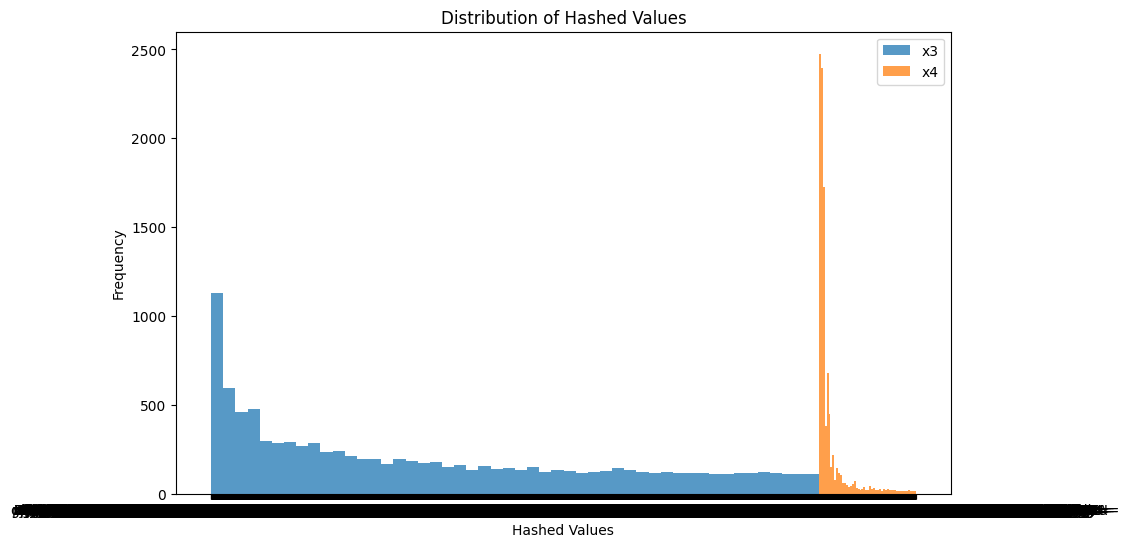

In [ ]:
# Assuming df is your DataFrame containing the CSV data

# Frequency analysis of x3
x3_freq = hashed['x3'].value_counts()

# Frequency analysis of x4
x4_freq = hashed['x4'].value_counts()

# Display the top 10 most frequent values for x3 and x4
print("Top 10 most frequent values in x3:")
print(x3_freq.head(10))
print("\nTop 10 most frequent values in x4:")
print(x4_freq.head(10))

# Optionally, plot histograms or bar charts
import matplotlib.pyplot as plt

# Example: Plotting histograms
plt.figure(figsize=(10, 6))
plt.hist(hashed['x3'], bins=50, alpha=0.75, label='x3')
plt.hist(hashed['x4'], bins=50, alpha=0.75, label='x4')
plt.xlabel('Hashed Values')
plt.ylabel('Frequency')
plt.title('Distribution of Hashed Values')
plt.legend()
plt.show()

In [ ]:

# List of columns to find unique values for
columns_to_check = ['x3', 'x4', 'x34', 'x35', 'x61', 'x64', 'x65', 'x91', 'x94', 'x95']

# Calculate and print number of unique values for each column
for col in columns_to_check:
    if col in hashed.columns:
        num_unique_values = hashed[col].nunique()
        print(f"Number of unique values in column '{col}': {num_unique_values}")
    else:
        print(f"Column '{col}' not found in the DataFrame.")

Number of unique values in column 'x3': 4751
Number of unique values in column 'x4': 758
Number of unique values in column 'x34': 5568
Number of unique values in column 'x35': 980
Number of unique values in column 'x61': 7115
Number of unique values in column 'x64': 5677
Number of unique values in column 'x65': 1018
Number of unique values in column 'x91': 3396
Number of unique values in column 'x94': 4647
Number of unique values in column 'x95': 759


In [ ]:
# List of columns to check for collisions
columns_to_check = ['x3', 'x4', 'x34', 'x35', 'x61', 'x64', 'x65', 'x91', 'x94', 'x95']

# Calculate and print collisions for each column
for col in columns_to_check:
    if col in hashed.columns:
        has_collision = hashed[col].duplicated().any()
        if has_collision:
            print(f"Column '{col}' has hash collisions.")
        else:
            print(f"No hash collisions found in column '{col}'.")
    else:
        print(f"Column '{col}' not found in the DataFrame.")

Column 'x3' has hash collisions.
Column 'x4' has hash collisions.
Column 'x34' has hash collisions.
Column 'x35' has hash collisions.
Column 'x61' has hash collisions.
Column 'x64' has hash collisions.
Column 'x65' has hash collisions.
Column 'x91' has hash collisions.
Column 'x94' has hash collisions.
Column 'x95' has hash collisions.



Entropy:
Measure of Information Content:

Entropy in the context of data refers to the amount of uncertainty or randomness in the data. Higher entropy indicates more unpredictability and information content.
For hashed columns, calculating entropy helps assess how evenly distributed the hashed values are. Higher entropy suggests that the hash function is effectively spreading the possible outputs across the range of possible values.
Quality of Hash Function:

An ideal hash function should produce outputs with high entropy, meaning each possible hash value is equally likely (uniform distribution).
Low entropy might indicate patterns or biases in the hash outputs, which could potentially compromise the security or uniqueness of the hashed data.
Security and Anonymization:

In security applications, such as hashing passwords or sensitive data, high entropy ensures that the hashed values are difficult to reverse-engineer or guess.
For anonymization purposes, high entropy indicates that the original data is effectively obscured, protecting individual identities or sensitive information.
Detection of Hash Collisions:

Calculating entropy can help in detecting potential hash collisions—cases where different inputs produce the same hash output. Low entropy might indicate a higher likelihood of collisions, depending on the size and distribution of the hashed values.

In [ ]:
# List of columns to calculate entropy for
columns_to_analyze = ['x3', 'x4', 'x34', 'x35', 'x61', 'x64', 'x65', 'x91', 'x94', 'x95']

# Calculate and print entropy for each column
for col in columns_to_analyze:
    if col in hashed.columns:
        entropy = scipy.stats.entropy(hashed[col].value_counts(normalize=True))
        print(f"Entropy of {col}: {entropy}")
    else:
        print(f"Column '{col}' not found in the DataFrame.")


Entropy of x3: 7.747196079299795
Entropy of x4: 4.662136139417061
Entropy of x34: 7.994636205504022
Entropy of x35: 4.888227319301066
Entropy of x61: 8.264600280065524
Entropy of x64: 8.023519604127046
Entropy of x65: 4.944964581370279
Entropy of x91: 6.44063944538253
Entropy of x94: 7.659779385949899
Entropy of x95: 4.61727263463301


## **Cross Column Analysis :**

In [ ]:
# Extract columns of interest
hashed_columns = ['x3', 'x4', 'x34', 'x35', 'x61', 'x64', 'x65', 'x91', 'x94', 'x95']
#columns_of_interest = hashed_columns + ['x1','x2','x5','x6','x7','x8','x9']  # Add other non-hashed columns as needed



In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/Data Science Assignement/AIQoD/train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Data Science Assignement/AIQoD/test.csv")

In [ ]:
for col in hashed_columns:
    if col in train_df.columns and col in test_df.columns:
        train_freq_dist = train_df[col].value_counts(normalize=True)
        test_freq_dist = test_df[col].value_counts(normalize=True)
        print(f"Frequency distribution for {col} in train dataset:\n{train_freq_dist}\n")
        print(f"Frequency distribution for {col} in test dataset:\n{test_freq_dist}\n")

Frequency distribution for x3 in train dataset:
x3
MZZbXga8gvaCBqWpzrh2iKdOkcsz/bG/z4BVjUnqWT0=    0.033827
X/hdUOVR5KuExVGLzjhLcM2CyIqym9t0Nh+ZX05M+1w=    0.011665
3acC0FNTp8BjTkXkLzy9LJSB0FmLpzsJhDtE3riGZ9A=    0.008165
zq3MyXbqpnH+txFzhEWomNfZyeLXubUbZwdaRvKXLs4=    0.007932
x4ZSntGbx3BETDURJUCCyghFITBw0VjgvAJ6MqTzVew=    0.007815
                                                  ...   
xjmTLdl3cvznW2FwUHzAy1isqqQ/MM75nhLGKaSAEFY=    0.000117
32TnZIoTdTuMO/QEiTndO7R2De+TXxjzsCcGB68PxSs=    0.000117
Zpdzn+mU6g3vVZMqG3IiKWgYk08wwV0eyt7zxX+yew8=    0.000117
l+LC+epkima2ujQczUHf+UXtXJfTXY7r7PDdGSSdSvg=    0.000117
9Avs0tL1zvH7Xx41z2UqrXs11/4IWLmqRAodLt/SKjQ=    0.000117
Name: proportion, Length: 4751, dtype: float64

Frequency distribution for x3 in test dataset:
x3
MZZbXga8gvaCBqWpzrh2iKdOkcsz/bG/z4BVjUnqWT0=    0.037515
zq3MyXbqpnH+txFzhEWomNfZyeLXubUbZwdaRvKXLs4=    0.011137
X/hdUOVR5KuExVGLzjhLcM2CyIqym9t0Nh+ZX05M+1w=    0.011137
4FEhTtnlYCwtJmxxhpa+u0Rm8nmKtzM6YHcjSarCgIQ=    0.008

In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.DataFrame({
    'train': train_df['x3'].value_counts(normalize=True),
    'test': test_df['x3'].value_counts(normalize=True)
}).fillna(0)

# Perform Chi-Square Test
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f"Chi-Square Test: chi2 = {chi2}, p-value = {p}")

Chi-Square Test: chi2 = 1.1907166264921025, p-value = 1.0


In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.DataFrame({
    'train': train_df['x4'].value_counts(normalize=True),
    'test': test_df['x4'].value_counts(normalize=True)
}).fillna(0)

# Perform Chi-Square Test
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f"Chi-Square Test: chi2 = {chi2}, p-value = {p}")

Chi-Square Test: chi2 = 0.2080293122918329, p-value = 1.0


In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.DataFrame({
    'train': train_df['x34'].value_counts(normalize=True),
    'test': test_df['x34'].value_counts(normalize=True)
}).fillna(0)

# Perform Chi-Square Test
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f"Chi-Square Test: chi2 = {chi2}, p-value = {p}")

Chi-Square Test: chi2 = 1.221497071304665, p-value = 1.0


In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.DataFrame({
    'train': train_df['x35'].value_counts(normalize=True),
    'test': test_df['x35'].value_counts(normalize=True)
}).fillna(0)

# Perform Chi-Square Test
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f"Chi-Square Test: chi2 = {chi2}, p-value = {p}")

Chi-Square Test: chi2 = 0.23622272325336574, p-value = 1.0


In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.DataFrame({
    'train': train_df['x94'].value_counts(normalize=True),
    'test': test_df['x94'].value_counts(normalize=True)
}).fillna(0)

# Perform Chi-Square Test
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f"Chi-Square Test: chi2 = {chi2}, p-value = {p}")

Chi-Square Test: chi2 = 1.0983008525851274, p-value = 1.0


In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.DataFrame({
    'train': train_df['x95'].value_counts(normalize=True),
    'test': test_df['x95'].value_counts(normalize=True)
}).fillna(0)

# Perform Chi-Square Test
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f"Chi-Square Test: chi2 = {chi2}, p-value = {p}")

Chi-Square Test: chi2 = 0.19291954568410033, p-value = 1.0
